# Supervised Learning Model Evaluation for stroke diagnosis

Stroke diagnosis involves a comprehensive assessment to determine the presence, type, and severity of a stroke, a serious medical condition characterized by disrupted blood flow to the brain along with demographic details of the patients. 

DATA DESCRIPTION FOR CATEGORICAL VARIABLE:

1. gender:
Male = 1
Female = 2
Other = 3

2. ever_married:
Yes = 1
No = 2

3. work_type:
Children = 1
Private = 2
Self-employed = 3
Govt_job = 4
Never_worked = 5

4. Residence_type:
Rural = 1
Urban = 2

5. Smoking status:
smokes = 1
unknown = 2
formerly smoked = 3
never smoked = 4


1. Import the stroke.csv dataset, get info, print header and examine the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression#machine learning
from sklearn.model_selection import train_test_split#split training and testing data


In [2]:
df = pd.read_csv('../DS2023/stroke.csv')

In [3]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,2,31,0,0,2,4,1,70.66,27.2,4,0
1,2,13,0,0,2,1,1,85.81,18.6,2,0
2,1,18,0,0,2,2,2,60.56,33.0,4,0
3,2,65,0,0,1,2,2,205.77,46.0,3,1
4,1,4,0,0,2,1,1,90.42,16.2,2,0


In [11]:
# split input and target
X= df.drop(["stroke"],axis=1)
y= df.stroke.values #input


In [12]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=0) 

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1085 entries, 0 to 1136
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             1085 non-null   int64  
 1   age                1085 non-null   object 
 2   hypertension       1085 non-null   int64  
 3   heart_disease      1085 non-null   int64  
 4   ever_married       1085 non-null   int64  
 5   work_type          1085 non-null   int64  
 6   Residence_type     1085 non-null   int64  
 7   avg_glucose_level  1085 non-null   float64
 8   bmi                1085 non-null   float64
 9   smoking_status     1085 non-null   int64  
 10  stroke             1085 non-null   int64  
dtypes: float64(2), int64(8), object(1)
memory usage: 101.7+ KB


In [14]:
#Accuracy for LR

accuracies = {} #empty dictionary to combine the accuracies of all algorithm

lr = LogisticRegression() #create model
lr.fit(X_train,y_train) #fit the training data

acc = lr.score(X_test,y_test)*100 #compute accuracy of model

accuracies['LogisticRegression'] = acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 88.94%


/Users/keyna/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [8]:
df['age'].replace('*82','82',inplace=True)

In [9]:
df.dropna(inplace=True)
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,2,31,0,0,2,4,1,70.66,27.2,4,0
1,2,13,0,0,2,1,1,85.81,18.6,2,0
2,1,18,0,0,2,2,2,60.56,33.0,4,0
3,2,65,0,0,1,2,2,205.77,46.0,3,1
4,1,4,0,0,2,1,1,90.42,16.2,2,0
...,...,...,...,...,...,...,...,...,...,...,...
1132,2,1,0,0,2,1,1,110.17,20.3,2,0
1133,1,6,0,0,2,1,1,92.98,18.9,2,0
1134,1,81,0,0,1,2,2,234.35,25.3,3,0
1135,2,81,1,0,1,2,1,80.43,29.7,4,1


In [15]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train) #fit the training data

acc = dtc.score(X_test,y_test)*100 #compute accuracy of model

accuracies['DecisionTreeClassifier'] = acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 82.95%


In [16]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train) #fit the training data

acc = rf.score(X_test,y_test)*100 #compute accuracy of model

accuracies['RandomForestClassifier'] = acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 88.48%


In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train) #fit the training data

acc = knn.score(X_test,y_test)*100 #compute accuracy of model

accuracies['KNeighborsClassifier'] = acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 88.48%


/Users/keyna/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [18]:
y_head_lr = lr.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_lr = confusion_matrix(y_test,y_head_lr)

In [19]:
y_head_dtc = dtc.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_dtc = confusion_matrix(y_test,y_head_dtc)

In [20]:
y_head_rf = rf.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_rf = confusion_matrix(y_test,y_head_rf)

In [21]:
y_head_knn = knn.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_knn = confusion_matrix(y_test,y_head_knn)

/Users/keyna/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


2. The target variable is stroke, perform model evaluation by comparing 4 different algorithms. Determine the model accuracy. Plot confusion matrix for all four algorithms. Compare the model accuracy and determine which algorithm is the best fit to predict the diagnosis of stroke. 

<AxesSubplot:title={'center':'KNeighborsClassifier Confusion Matrix'}>

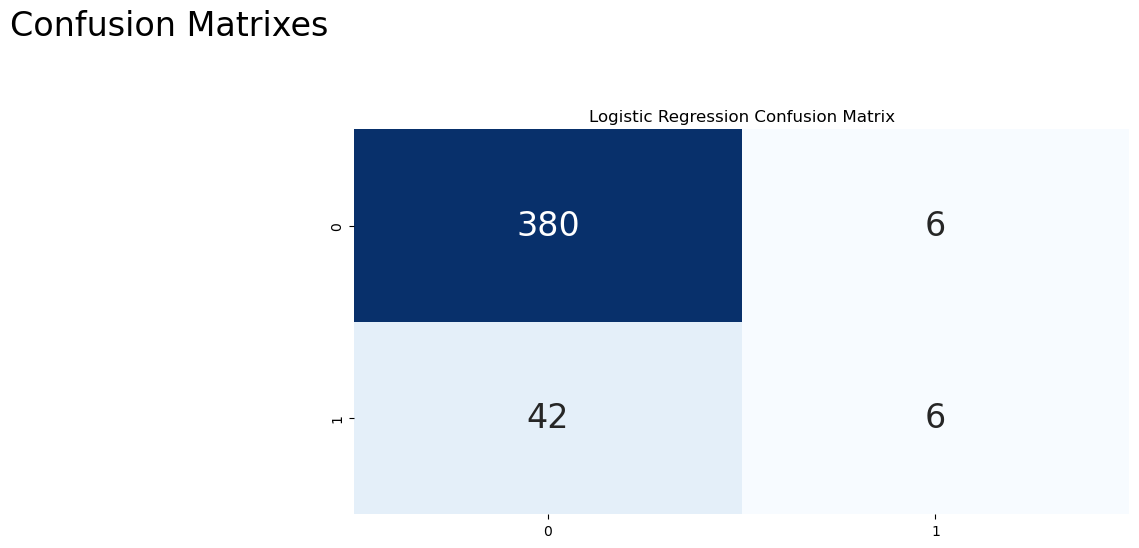

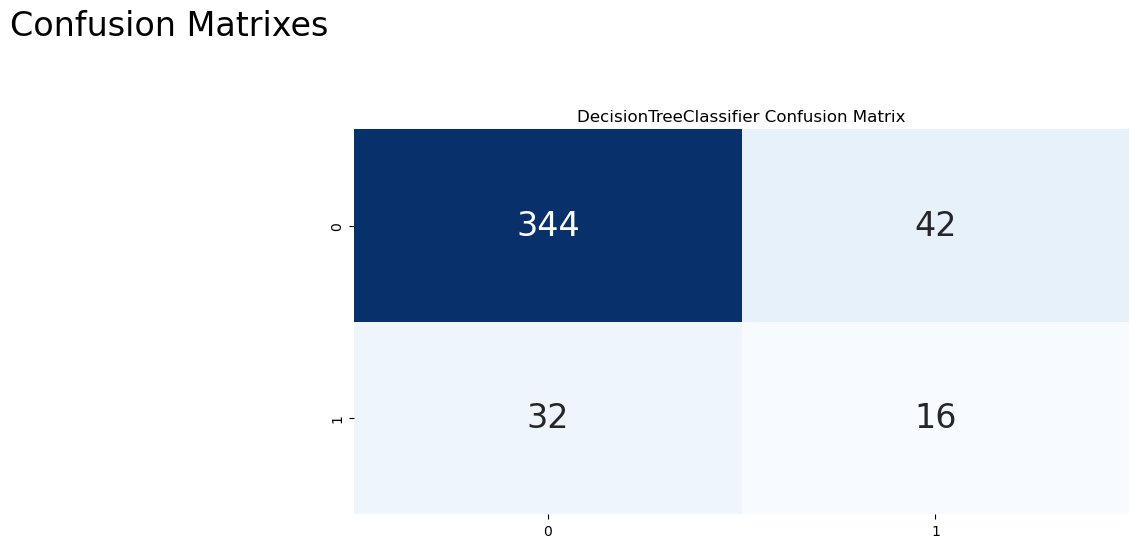

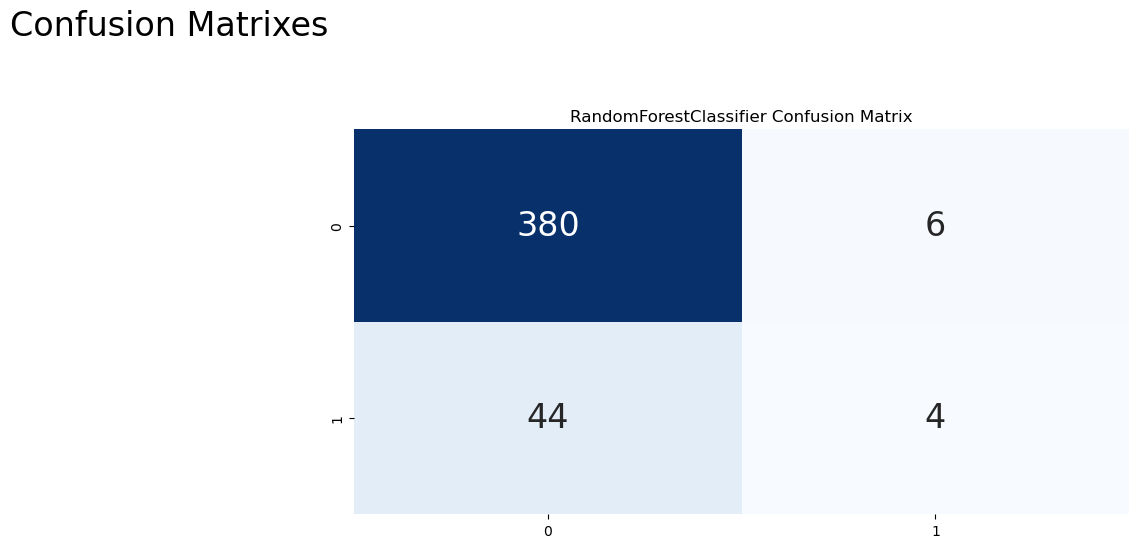

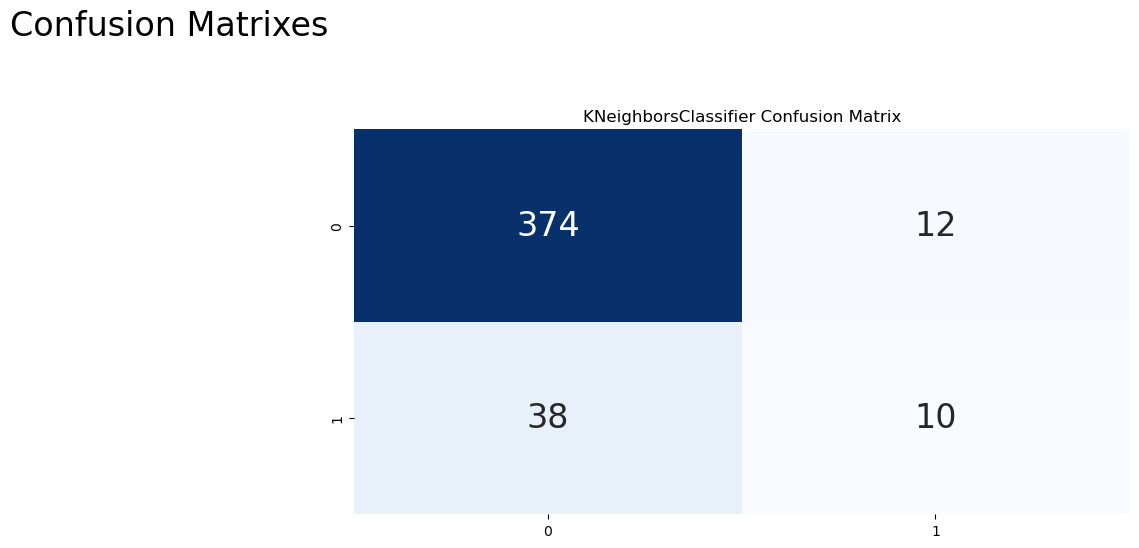

In [22]:
#lr
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,2,2)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

#dtc
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,2,2)
plt.title("DecisionTreeClassifier Confusion Matrix")
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

#rf
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,2,2)
plt.title("RandomForestClassifier Confusion Matrix")
sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

#knn
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,2,2)
plt.title("KNeighborsClassifier Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})


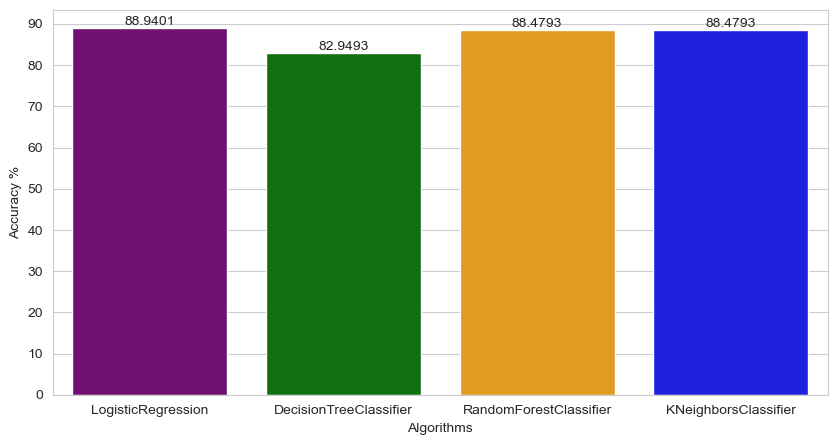

In [23]:
colors = ["purple", "green", "orange", "blue"]

sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
ax = sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)

for i in ax.containers: #function1
    ax.bar_label(i, ) #function2

plt.show()
            

In [24]:
df.to_csv("updated_stroke.csv")

In [25]:
df = pd.read_csv('../DS2023/updated_stroke.csv')

In [26]:
# split input and target
X= df.drop(["stroke"],axis=1)
y= df.stroke.values #input

In [27]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
from sklearn.metrics import accuracy_score

lr_classifier = LogisticRegression(random_state=42)
lr_classifier.fit(X_train, y_train)

# Predictions
y_pred = lr_classifier.predict(X_test)#predict the target based on model

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)#compute prediction accuracy
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.88


/Users/keyna/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


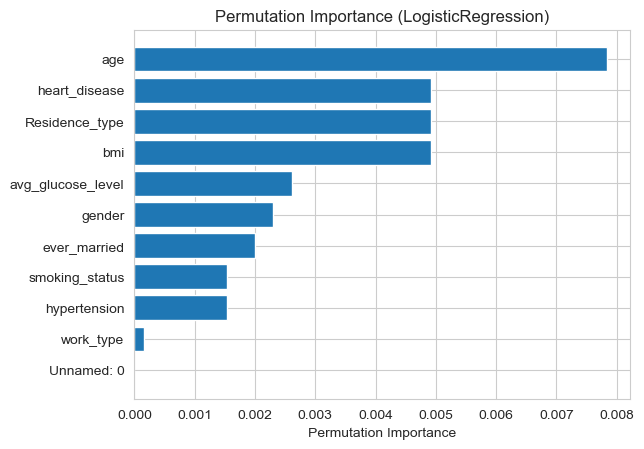

In [33]:
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(lr_classifier, X_test, y_test, n_repeats=30, random_state=42)

# Get feature names
feature_names = X_test.columns

# Calculate mean importance and sort features
mean_importance = perm_importance.importances_mean
sorted_idx = mean_importance.argsort()

# Plot permutation importance
plt.barh(range(len(sorted_idx)), mean_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)),[feature_names[i] for i in sorted_idx])
plt.xlabel('Permutation Importance')
plt.title('Permutation Importance (LogisticRegression)')
plt.show()

In [63]:
# Get feature importances from LogisticRegression
lr_feature_importances = lr_classifier.feature_importances_
# Sort features by importance
sorted_idx_lr = lr_feature_importances.argsort()

# Plot feature importances from LogisticRegression
plt.barh(range(len(sorted_idx_lr)), lr_feature_importances[sorted_idx_lr], align='center')
plt.yticks(range(len(sorted_idx_lr)),[feature_names[i] for i in sorted_idx_lr])
plt.xlabel('Feature Importance')
plt.title('Feature Importance (LogisticRegression)')
plt.show()

AttributeError: 'LogisticRegression' object has no attribute 'feature_importances_'

In [59]:
conda install -c anaconda graphviz

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.3.1
  latest version: 23.9.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.9.0



# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [60]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [61]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz #Decision tree
import matplotlib.pyplot as plt
import pydotplus

In [62]:
clf_dt = DecisionTreeClassifier(criterion = 'gini', max_depth = 3)
clf_dt.fit(X, y)

dot_data = export_graphviz(clf_dt,
                                feature_names=X_test.columns,
                                out_file=None,
                                filled=True,
                                rounded=True)

pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.write_png('tree.png')

True